# Insurance data - Numeric prediction using Regression methods

In order for a health insurance company to make money, it needs to collect more
in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.<br>
<br>
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.<br>
<br>
The goal of this analysis is to use patient data to estimate the average medical
care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower, 
depending on the expected treatment costs.<br>
<br>
The insurance data set has 1338 observations of 7 variables.
<br>
We will use this file to predict the medical expenses.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
age:	      age in years<br>
sex:	      gender<br>
bmi:	      body mass index<br>
children:	how many children do they have?<br>
smoker:	  do they smoke?<br>
region:	  geographic region<br>
expenses:	yearly medical expenses<br>
<br>
Target variable: **expenses**



## Import libraries

In [2]:
# Import libraries
! pip install regressors
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from regressors import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12375 sha256=9b2a10990a2c06dff65f178baa25d082b24da4b7907b6f850b49fea56078bdb4
  Stored in directory: /Users/yashmishra/Library/Caches/pip/wheels/46/c3/e9/d1797db3a01a1f101ad3cbcdf01b1be7273a25c78c77dd4bb9
Successfully built regressors




## Upload and clean data

In [3]:
# Read data
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
# Show the head rows of a data frame
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# Examine variable type
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [6]:
# Change categorical variables to "category"
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

In [7]:
# Examine variable type
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

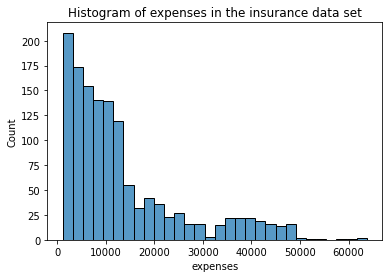

In [8]:
# Data exploration: some examples
# Histogram of insurance expenses
snsplot = sns.histplot(x='expenses', data = insurance)
snsplot.set_title("Histogram of expenses in the insurance data set")

In [9]:
# exploring relationships among all numeric variables: correlation matrix
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


## Partition and examine the data set for regression model

In [10]:
# Create dummy variables
insurance = pd.get_dummies(insurance, columns=['sex','smoker','region'], drop_first=True)
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [11]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 8) (402, 8) (936,) (402,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

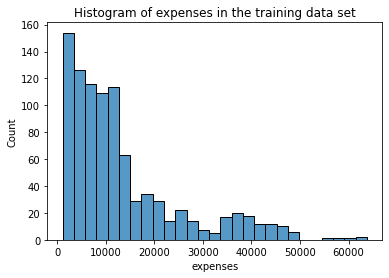

In [12]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

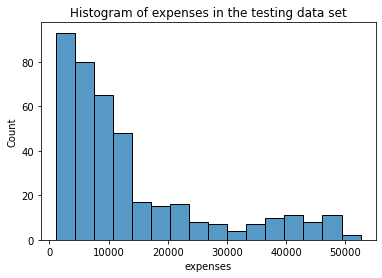

In [13]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")

## Model 1: Simple linear regression

In [14]:
# Build a simple linear regression model with only bmi as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train[['bmi']], target_train)

LinearRegression()

In [15]:
# Show model summary
predictor_names = predictors_train[['bmi']].columns.values
stats.summary(model1, predictors_train[['bmi']], target_train, predictor_names)

Residuals:
        Min        1Q    Median        3Q        Max
-49481.7796 -4689.504 3797.5184 8046.6149 19753.6216


Coefficients:
               Estimate   Std. Error  t value   p value
_intercept  2657.251940  1921.093525   1.3832  0.166934
bmi          343.876266    14.021460  24.5250  0.000000
---
R-squared:  0.03258,    Adjusted R-squared:  0.03154
F-statistic: 31.45 on 1 features


In [16]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['bmi']])

In [17]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 9462.431449463487
RMSE: 12299.253726819523


## Model 2: Multiple linear regression

In [18]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [19]:
# Show model summary
predictor_names = predictors_train.columns.values
stats.summary(model2, predictors_train, target_train, predictor_names)

Residuals:
        Min         1Q   Median       3Q        Max
-30302.4407 -1343.2315 985.6509 2988.446 11148.5211


Coefficients:
                      Estimate   Std. Error  t value   p value
_intercept       -11836.117831  1191.289921  -9.9355  0.000000
age                 256.402924    10.186903  25.1699  0.000000
bmi                 335.414456    16.372545  20.4864  0.000000
children            472.939931   166.843442   2.8346  0.004687
sex_male            -47.692891   400.980436  -0.1189  0.905348
smoker_yes        23435.046128   501.984750  46.6848  0.000000
region_northwest   -561.353117   545.419326  -1.0292  0.303645
region_southeast   -995.537125   551.901974  -1.8038  0.071580
region_southwest   -798.824371   541.710520  -1.4746  0.140648
---
R-squared:  0.73096,    Adjusted R-squared:  0.72864
F-statistic: 314.82 on 8 features


In [20]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [21]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 4011.3808850910846
RMSE: 5773.7111375700415


## Model 3: Improving Model Performance by Adding non-linear relationships

Adding a higher-order "age" term.

In [22]:
# add a higher-order "age" term
insurance['age2'] = insurance['age'] ** 2

In [23]:
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2
0,19,27.9,0,16884.92,0,1,0,0,1,361
1,18,33.8,1,1725.55,1,0,0,1,0,324
2,28,33.0,3,4449.46,1,0,0,1,0,784
3,33,22.7,0,21984.47,1,0,1,0,0,1089
4,32,28.9,0,3866.86,1,0,1,0,0,1024
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0,2500
1334,18,31.9,0,2205.98,0,0,0,0,0,324
1335,18,36.9,0,1629.83,0,0,0,1,0,324
1336,21,25.8,0,2007.95,0,0,0,0,1,441


In [24]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 9) (402, 9) (936,) (402,)


In [25]:
# Build a linear regression model with non-linear relationships
model3 = linear_model.LinearRegression()
model3.fit(predictors_train, target_train)

LinearRegression()

In [26]:
# Show model summary
predictor_names = predictors_train.columns.values
stats.summary(model3, predictors_train, target_train, predictor_names)

Residuals:
        Min         1Q   Median        3Q        Max
-30897.6196 -1143.0599 976.6449 3010.6995 10996.9905


Coefficients:
                      Estimate   Std. Error  t value   p value
_intercept        -7946.613879  2024.274416  -3.9257  0.000093
age                  27.144543    49.795286   0.5451  0.585799
bmi                 333.788744    21.173262  15.7646  0.000000
children            591.183643   171.920444   3.4387  0.000610
sex_male            -70.422281   400.892935  -0.1757  0.860596
smoker_yes        23462.056874   502.406607  46.6993  0.000000
region_northwest   -526.692320   548.948589  -0.9595  0.337577
region_southeast   -967.924415   550.533067  -1.7582  0.079048
region_southwest   -781.301189   542.270220  -1.4408  0.149977
age2                  2.888628     0.108131  26.7142  0.000000
---
R-squared:  0.73257,    Adjusted R-squared:  0.72997
F-statistic: 281.85 on 9 features


In [27]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [28]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 3953.760246314616
RMSE: 5707.448582070194


## Model 4: Add an interaction effect.

In [29]:
# add an indicator for BMI >= 30
insurance.loc[insurance['bmi'] >= 30, 'bmi30'] = 1
insurance.loc[insurance['bmi'] < 30, 'bmi30'] = 0
insurance['bmi30'] = insurance['bmi30'].astype('category')

In [30]:
# add an interaction effects bmi30*smoker
insurance['bmi30_smoker'] = insurance['bmi30'].astype(float) * insurance['smoker_yes'].astype(float)

In [31]:
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,bmi30,bmi30_smoker
0,19,27.9,0,16884.92,0,1,0,0,1,361,0.0,0.0
1,18,33.8,1,1725.55,1,0,0,1,0,324,1.0,0.0
2,28,33.0,3,4449.46,1,0,0,1,0,784,1.0,0.0
3,33,22.7,0,21984.47,1,0,1,0,0,1089,0.0,0.0
4,32,28.9,0,3866.86,1,0,1,0,0,1024,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0,2500,1.0,0.0
1334,18,31.9,0,2205.98,0,0,0,0,0,324,1.0,0.0
1335,18,36.9,0,1629.83,0,0,0,1,0,324,1.0,0.0
1336,21,25.8,0,2007.95,0,0,0,0,1,441,0.0,0.0


In [32]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 11) (402, 11) (936,) (402,)


In [33]:
# Build a linear regression model with non-linear relationships
model4 = linear_model.LinearRegression()
model4.fit(predictors_train, target_train)

LinearRegression()

In [34]:
# Show model summary
predictor_names = predictors_train.columns.values
stats.summary(model4, predictors_train, target_train, predictor_names)

Residuals:
        Min     1Q    Median        3Q       Max
-24356.6801 818.38 1311.4334 1694.2262 4055.3453


Coefficients:
                      Estimate   Std. Error  t value   p value
_intercept        -1334.525875  1638.900791  -0.8143  0.415691
age                  45.644502    38.078226   1.1987  0.230947
bmi                 124.927286    17.127101   7.2941  0.000000
children            602.951131   127.997651   4.7106  0.000003
sex_male           -323.859152   298.512453  -1.0849  0.278241
smoker_yes        13444.538555   471.284949  28.5274  0.000000
region_northwest   -565.712615   408.660324  -1.3843  0.166594
region_southeast  -1022.186642   409.954486  -2.4934  0.012824
region_southwest  -1158.326763   403.636849  -2.8697  0.004201
age2                  2.808353     0.080626  34.8318  0.000000
bmi30             -1000.934145   483.373489  -2.0707  0.038658
bmi30_smoker      20016.357007   701.429309  28.5365  0.000000
---
R-squared:  0.85189,    Adjusted R-squared:  0.85012

In [35]:
# Make predictions on testing data
prediction_on_test = model4.predict(predictors_test)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

### Model4 is the best out of all the above models as it has the lowest MAE and RMSE values.

## Model 5: Regression tree

In [37]:
# Partition the data
insurance = insurance.drop(['age2', 'bmi30', 'bmi30_smoker'], axis=1)
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(936, 8) (402, 8) (936,) (402,)


In [38]:
# Build a regression tree model with max_depth=3
model5 = DecisionTreeRegressor(random_state=0, max_depth=3)
model5.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(837.0, 951.3000000000001, 'smoker_yes <= 0.5\nmse = 140986232.992\nsamples = 936\nvalue = 13232.917'),
 Text(418.5, 679.5, 'age <= 42.5\nmse = 37737689.343\nsamples = 746\nvalue = 8616.732'),
 Text(209.25, 407.70000000000005, 'age <= 26.5\nmse = 22225840.036\nsamples = 407\nvalue = 5418.786'),
 Text(104.625, 135.89999999999998, 'mse = 21407146.41\nsamples = 177\nvalue = 3657.79'),
 Text(313.875, 135.89999999999998, 'mse = 18632806.318\nsamples = 230\nvalue = 6773.987'),
 Text(627.75, 407.70000000000005, 'age <= 51.5\nmse = 29341634.547\nsamples = 339\nvalue = 12456.154'),
 Text(523.125, 135.89999999999998, 'mse = 24590721.601\nsamples = 141\nvalue = 10446.126'),
 Text(732.375, 135.89999999999998, 'mse = 27798883.343\nsamples = 198\nvalue = 13887.537'),
 Text(1255.5, 679.5, 'bmi <= 29.95\nmse = 134204999.764\nsamples = 190\nvalue = 31357.516'),
 Text(1046.25, 407.70000000000005, 'age <= 41.0\nmse = 25603580.987\nsamples = 96\nvalue = 21353.204'),
 Text(941.625, 135.89999999999998,

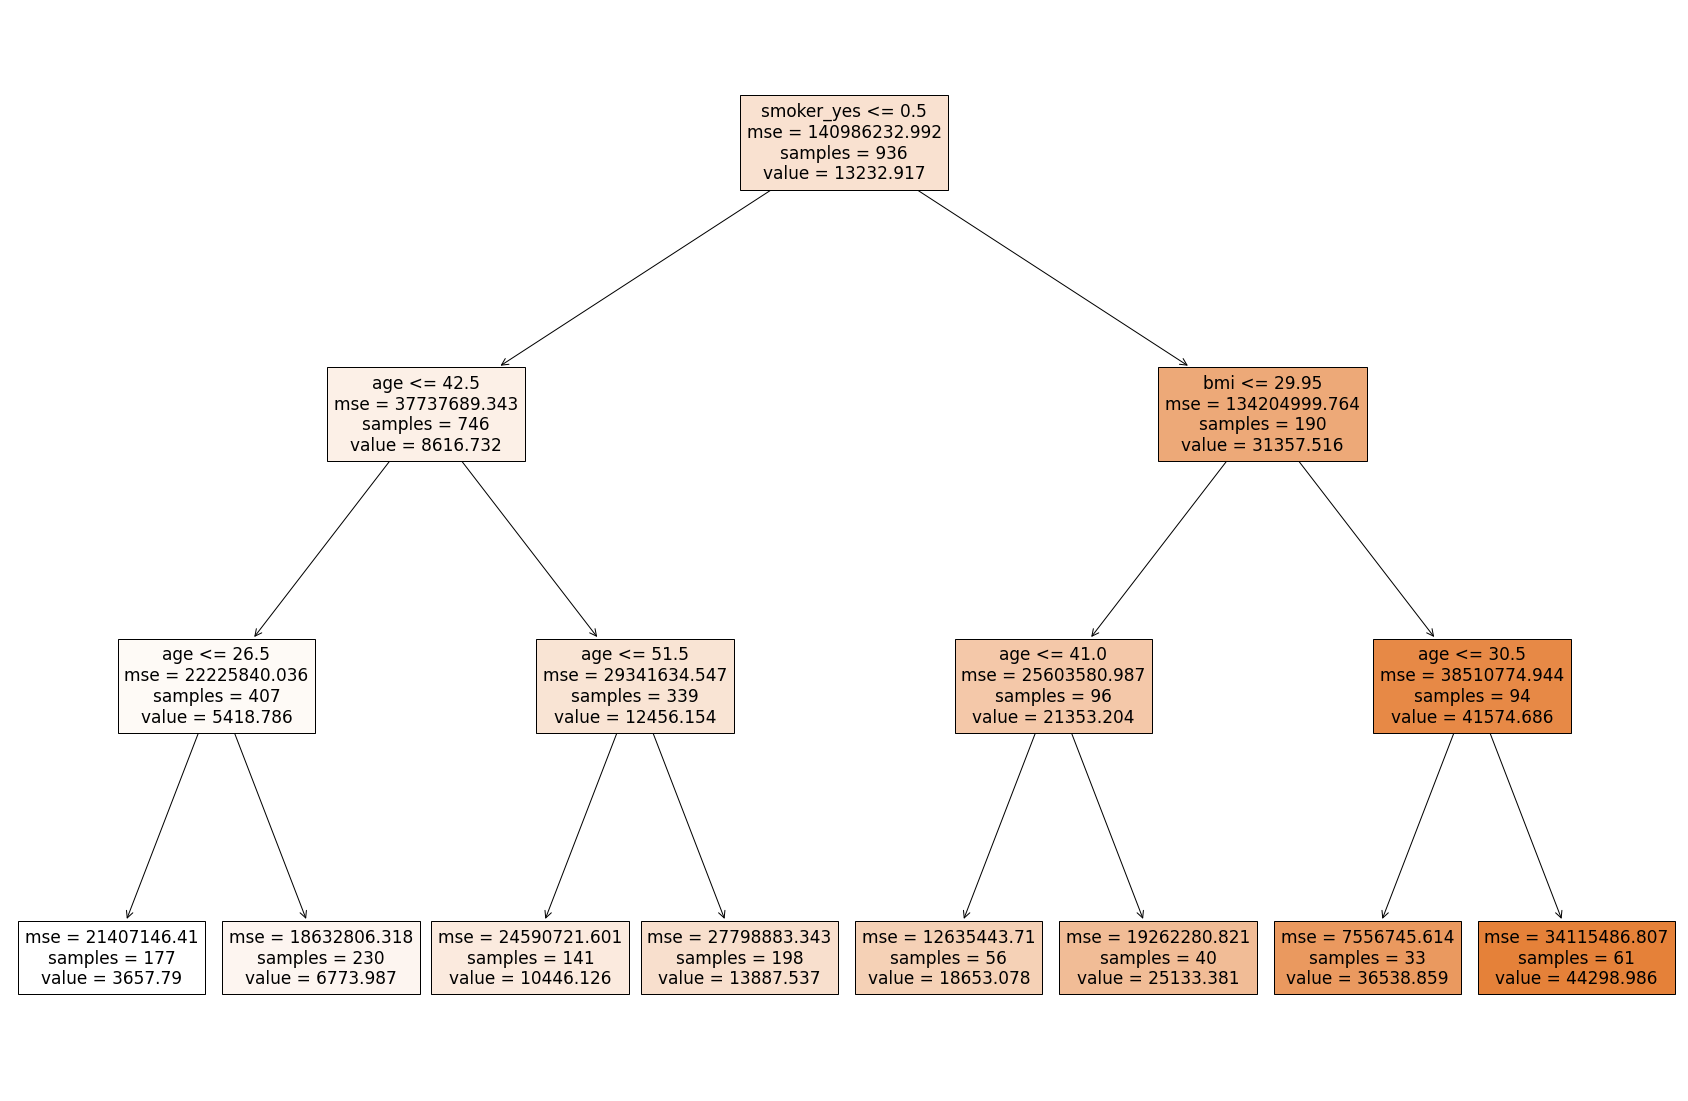

In [39]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model5, 
               feature_names=list(predictors_train.columns),  
               filled=True)

In [40]:
# Make predictions on testing data
prediction_on_test = model5.predict(predictors_test)

In [41]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 2717.5186416559495
RMSE: 4462.881172027449


### From all the above Numeric prediction models model4 with the interaction effect and model5 (Regression tree) models have the lowest MAE and RMSE values which means model4 is the best out of all the above models as the error is lowest and model5 is the 2nd best. 